# D200, Problem Set 1: Gradient Descent

Due: 4 February 2025 [here](https://classroom.github.com/a/Ill2aQrC) in
groups of 4.

Stefan Bucher

This problem set will introduce you to the gradient descent algorithm to
solve the linear regression problem discussed in the lecture.[1] We will
consider a univariate linear regression and seek to fit the parameters
$\theta_0$ and $\theta_1$.

# Problem 1

**(1a)** Write down the mean-squared error function and its gradient
with respect to the parameters.

**Solution:** The MSE loss is given by
$L(\theta) = \frac{1}{n} \sum_{i=1}^n (y_i - (\theta_1 x_i + \theta_0))^2$.
The gradient with respect to the parameters is given by

**(1b)** Implement the loss function `loss(X,y,theta)` and gradient
function `gradient(X,y,theta)` in Python.

[1] The problem set is adapted from Chi Jin’s OxML 2024 Fundamentals
class on Optimization.

In [2]:
def loss(X, y, theta):
   n = y.size
   return np.sum((y - X.dot(theta))**2)/(2*n)

def gradient(X, y, theta):
    n = y.size
    return - X.T.dot( y - X.dot(theta) ) / n

# Problem 2

**(2a)** Implement the simple gradient descent algorithm as a Python
function
`gradient_descent(X, y, theta_init, alpha, maxsteps, precision)`. The
function should take the data $X$, $y$, initial parameters $\theta$,
step size, maximum number of steps, and a precision tolerance parameter.
The function should return the history of the parameters, the cost at
each step, and the predictions at each step.

In [3]:
def gradient_descent(X, y, theta_init, alpha, maxsteps, precision=1e-12):
   n = y.size # number of data points
   theta = theta_init

   counter = 0
   oldcost = 0
   preds = []
   costs = []
   history = [] # to store all thetas

   history.append(theta)

   currentcost = loss(X, y, theta) 
   costs.append(currentcost)

   preds.append(X.dot(theta))

   counter+=1

   while abs(currentcost - oldcost) > precision: 
      oldcost=currentcost
      theta = theta - alpha * gradient(X, y, theta)   # update
      history.append(theta)

      currentcost = loss(X, y, theta) 
      costs.append(currentcost)

      if counter % 25 == 0: 
         preds.append(X.dot(theta))
      counter+=1
      if maxsteps:
         if counter == maxsteps:
               break

   return history, costs, preds, counter

Then, use this function to print the resulting estimate, and plot the
evolution of the parameters and the mean-squared loss over 2000
iterations, with initial parameters $\theta_0=\theta_1=0$ and learning
rate $\alpha=0.01$.

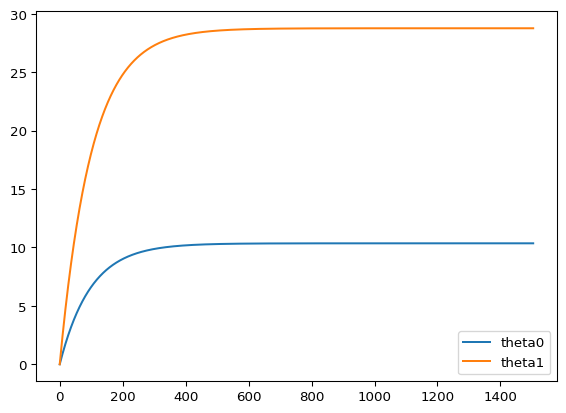

Last theta0=10.355866417101666 and theta1=28.76790925517708

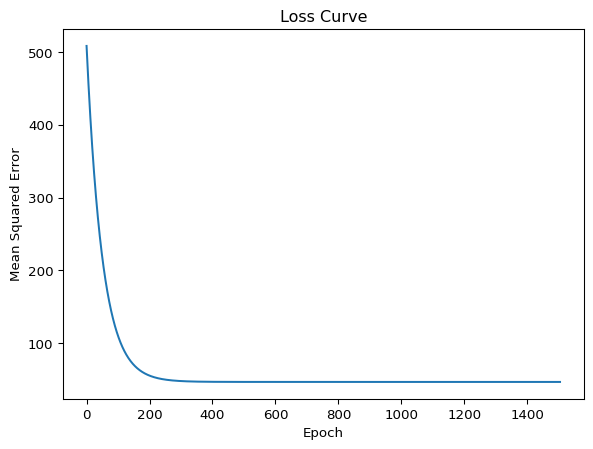

Last MSE value: 46.50810324168273

In [4]:
history, costs, preds, _ = gradient_descent(X=X, y=y, theta_init=[0,0], alpha=0.01, maxsteps=2000)

# Plot thetas
pd.DataFrame(history, columns=['theta0', 'theta1']).plot()
plt.show()

# Print the final values
print(f'Last theta0={history[-1][0]} and theta1={history[-1][1]}')

# Plot the loss curve
plt.plot(range(len(costs)), costs)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve')
plt.show()

# Print the last MSE value
print(f'Last MSE value: {costs[-1]}')

**(2b)** Compare the resulting estimates with those generated by
`scipy.stats`, `statsmodels`, or `sklearn`. Plot the best-fitting line
along with a scatterplot of the data.

Intercept: 10.355868508108216, Slope: 28.7679190596669

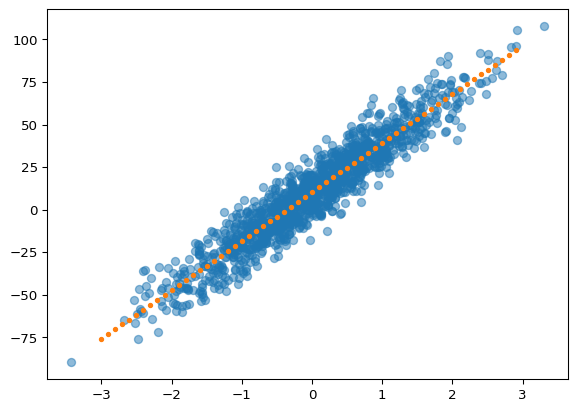

In [5]:
from scipy import stats
slope, intercept, _,_,_ = stats.linregress(x, y)
print(f'Intercept: {intercept}, Slope: {slope}')

best_fit = np.vectorize(lambda x: x*slope+intercept)
plt.plot(x, y, 'o', alpha=0.5)
grid = np.arange(-3, 3, 0.1)
plt.plot(grid, best_fit(grid), '.')

In [6]:
# Statsmodels
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.136e+04
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:26:23   Log-Likelihood:                -4790.9
No. Observations:                1300   AIC:                             9586.
Df Residuals:                    1298   BIC:                             9596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3559      0.268     38.685      0.0

In [7]:
# sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f'Intercept: {model.intercept_}, Coefficients: {model.coef_}')

Intercept: 10.355868508108216, Coefficients: [ 0.         28.76791906]

# Problem 3

Visualize the loss surface, using the provided helper functions.

In [8]:
from matplotlib import cm
import warnings 
warnings.filterwarnings("ignore")


def plotting(history, cost):
    theta1s = np.linspace(slope - 40 , slope + 30, 50)
    theta0s = np.linspace(intercept - 40 , intercept + 30, 50)
    M, B = np.meshgrid(theta1s, theta0s)
    zs = np.array([loss(X, y, theta)
                  for theta in zip(np.ravel(B), np.ravel(M))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0, color='white', alpha=0.8)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.view_init(elev=15., azim=73)
    ax.plot([history[-1][1]], [history[-1][0]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10) # last point
    ax.plot([history[0][1]], [history[0][0]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10) # first point

    ax.plot([t[1] for t in history], [t[0] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15) # cost history
    ax.plot([t[1] for t in history], [t[0] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5) # projection on the origin plane

    ax.set_xlabel(r'$\theta_1$', fontsize=24)
    ax.set_ylabel(r'$\theta_0$', fontsize=24)
    ax.set_title(f"Iteration: {len(history)}", fontsize=24, fontweight='bold')


def plotting_diverge(history, cost):
    #print("X: ", theta[1]," abs(theta[1]) :", abs(theta[1]))
    theta1s = np.linspace(  -(-0.34 + abs(theta[1])*0.6 + 50) , -0.34 + abs(theta[1])*0.6 +50, 50)
    theta0s = np.linspace(79.18 - abs(theta[1]) -200, 79.18 + abs(theta[1]) +200, 50)
    M, B = np.meshgrid(theta1s, theta0s)
    zs = np.array([loss(X, y, theta)
                  for theta in zip(np.ravel(B), np.ravel(M))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, color='b', alpha=0.8)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.view_init(elev=15., azim=73)
    ax.plot([history[0][1]], [history[0][0]], [cost[0]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)
    ax.plot([history[0][1]], [history[0][0]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

    ax.plot([t[1] for t in history], [t[0] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=15)
    ax.plot([t[1] for t in history], [t[0] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)

    ax.set_xlabel(r'$\theta_1$', fontsize=24)
    ax.set_ylabel(r'$\theta_0$', fontsize=24)
    ax.set_title(f"Iteration: {len(history)}", fontsize=24, fontweight='bold')


def gen_gif(method_name,h,c,div=False):
  %matplotlib notebook
  from tqdm import tqdm
  #import os
  # generate gif, run after the specific method run
  theta =  h[-1]
  method_name = method_name

  # use tqdm to create a progress bar
  print("Produce the pngs")
  for i in range(1,len(h)+1):
    history_, cost_ = h[0:i], c[0:i]
    if not div:
      plotting(history_,cost_)
    else:
      plotting_diverge(history_,cost_)
    plt.savefig(f'figures/{method_name}-{i}.png')

  import imageio
  import os
  print("Produce the GIF")
  with imageio.get_writer(f'figures/{method_name}.gif', mode='I') as writer:
      for filename in tqdm([f'figures/{method_name}-{i}.png' for i in range(1,len(h)+1)], desc="Creating GIF"):
          image = imageio.imread(filename)
          writer.append_data(image)
          os.remove(filename)


def plotting_loss_surface():
    theta1s = np.linspace(slope - 40 , slope + 30, 50)
    theta0s = np.linspace(intercept - 40 , intercept + 30, 50)
    M, B = np.meshgrid(theta1s, theta0s)
    zs = np.array([loss(X, y, theta)
                  for theta in zip(np.ravel(B), np.ravel(M))])
    Z = zs.reshape(M.shape)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0, color='b', alpha=0.8)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=0)
    ax.view_init(elev=15., azim=73)

    ax.set_xlabel(r'$\theta_1$',fontsize=24)
    ax.set_ylabel(r'$\theta_0$',fontsize=24)

Use function `plotting(history, costs)` to visualize the loss surface
for various values of the hyperparameter `alpha` to get an intuition for
how the learning rate affects the performance of the algorithm. Discuss
your observations.

In [9]:
plotting_loss_surface()



step_size = 0.5

for step_size in [0.5, 0.1, 2.3]:
   history, costs, preds, _ = gradient_descent(X=X, y=y, theta_init=[0,0], alpha=step_size, maxsteps=2000, precision=0.0001)

   plotting(history,costs)
   gen_gif(f'gd{step_size}', history, costs)